In [30]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from proj1_helpers import *
from implementations import *
from losses import *
from EDA import *
from plots import *
from cross_validation import *
from methods import *
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [55]:
!git push

fatal: could not read Username for 'https://github.com': No such device or address


In [50]:
!git push

fatal: could not read Username for 'https://github.com': No such device or address


# Graphical exploration

#### Load the training data into feature matrix, class labels, and event ids

***

In [31]:
# Load the tarin data set
DATA_TRAIN_PATH = "../data/train.csv"
data_y, data_set, ids = load_csv_data(DATA_TRAIN_PATH, sub_sample=True)

# Classification of the output
y_0, y_1, y_2, y_3 = y_classification(data_y, data_set)

# EDA for each class
class_0, class_1, class_2, class_3 = EDA_class(data_set, exploratory=True)

## Correlation matrix
***

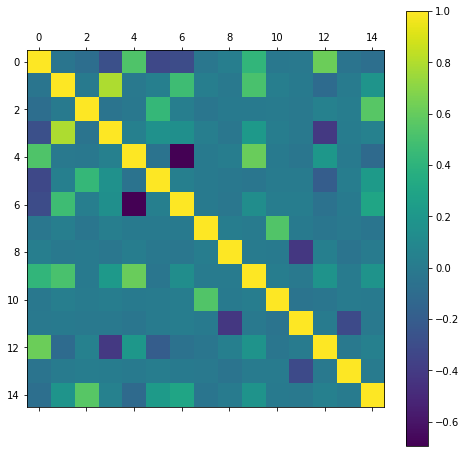

In [32]:
correlation_plot(class_0)

**Remark:** There is no particular correlation to notice betweeen the different features of the class 0.

## Histograms

***

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


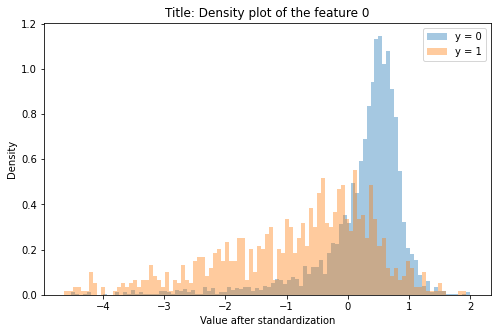

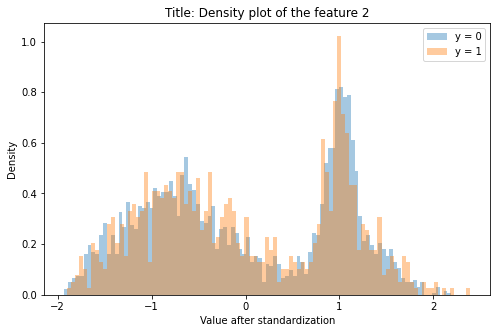

In [33]:
# Check if some feature seems to be useless in this classification
histogram_plot(y_0, class_0, [0, 2])

**Remark:**  We can notice that the feature 0 seems to very decisive in the classification, but it is not the case for the feature 2. Then, we can remove this last without losing information for our classification.
We apply this idea to all the features and we obtain the following list of the features that we can remove: [2, 5, 8, 11, 13, 14]. For seeing the histograms of all the features, you just have to run the following piece of code in a cell: 'histogram_plot(y_0, class_0, [0, 2])'.

# Cross validation

Now, the graphical analysis is done, we can use cross validation to select our best model (with its corresponding method).
***

In [34]:
# Classification of the output
y_0, y_1, y_2, y_3 = y_classification(data_y, data_set)
# Apply the exploratory graphical analysis
class_0, class_1, class_2, class_3 = EDA_class(data_set, exploratory=False)

In [35]:
# Initialization of some parameters
max_degree = 6
mse = MSE()
neg_log = Neg_log()
kfold = 4

#### Least squares method

***

In [36]:
# Parameters initialization
param_least = Parameters()
param_least.set_degree(max_degree)
param_least.set_method(least_squares_)
param_least.set_k_fold(kfold)
param_least.set_viz(False)
param_least.set_use_backward_selection(True)
param_least.set_use_interactions(True)

# Cross validation
param_least = cross_validation_poly(y_0, class_0, param_least)


print("Best train error: ", param_least.best_train_error)
print("Best test error: ", param_least.best_error)
print('Std: ', param_least.std)


Forward step
Test error:  15.51901336073998  Train error:  15.54470709146968 

Backward step
Test error:  15.544707091469682  Train error:  15.202124015073656 

Interactions step 

Best train error:  14.850976361767728
Best test error:  15.082219938335045
Std:  1.516365537479907


#### Gradient descent method

***

In [37]:
# Parameters initialization
param_GD = Parameters()
param_GD.set_degree(max_degree)
param_GD.set_loss_fct(mse)
param_GD.set_k_fold(kfold)
param_GD.set_method(least_squares_GD_)
param_GD.set_to_test(['gamma'])
param_GD.set_viz(False)
param_GD.set_use_backward_selection(True)
param_GD.set_use_interactions(True)

# Cross validation
param_GD = cross_validation_poly(y_0, class_0, param_GD)

print("Best train error: ", param_GD.best_train_error)
print("Best test error: ", param_GD.best_error)
print('Std: ', param_GD.std)

Forward step


/content/ML-Project/Project 1/scripts/implementations.py:63: RuntimeWarning: invalid value encountered in subtract
  w = w - (parameters.gamma * grad)


Test error:  17.471736896197328  Train error:  17.446043165467625 

Backward step
Test error:  21.608427543679344  Train error:  21.58273381294964 

Interactions step 

Best train error:  17.077766358341897
Best test error:  16.906474820143885
Std:  1.3527694327942639


#### Stochastic gradient descent

***

In [38]:
# Parameters initialization
param_SGD = Parameters()
param_SGD.set_degree(max_degree)
param_SGD.set_k_fold(kfold)
param_SGD.set_loss_fct(mse)
param_SGD.set_method(least_squares_SGD_)
param_SGD.set_to_test(['gamma'])
param_SGD.set_viz(False)
param_SGD.set_use_backward_selection(True)
param_SGD.set_use_interactions(True)

# Cross validation
param_SGD = cross_validation_poly(y_0, class_0, param_SGD)

print("Best train error: ", param_SGD.best_train_error)
print("Best test error: ", param_SGD.best_error)
print('Std: ', param_SGD.std)

Forward step
Test error:  19.964028776978417  Train error:  20.751969852689275 

Backward step
Test error:  22.3021582733813  Train error:  22.584789311408016 

Interactions step 

Best train error:  19.630010277492293
Best test error:  18.910585817060635
Std:  1.44799617714341


#### Ridge regression

***

In [39]:
# Parameters initialization
param_ridge = Parameters()
param_ridge.set_degree(max_degree)
param_ridge.set_loss_fct(mse)
param_ridge.set_k_fold(kfold)
param_ridge.set_method(ridge_regression_)
param_ridge.set_to_test(['lambda'])
param_ridge.set_viz(False)
param_ridge.set_use_backward_selection(True)
param_ridge.set_use_interactions(True)

# Cross validation
param_ridge = cross_validation_poly(y_0, class_0, param_ridge)

print("Best train error: ", param_ridge.best_train_error)
print("Best test error: ", param_ridge.best_error)
print('Std: ', param_ridge.std)

Forward step
Test error:  16.366906474820144  Train error:  16.127098321342928 

Backward step
Test error:  15.621788283658788  Train error:  15.210688591983555 

Interactions step 

Best train error:  15.073655361425145
Best test error:  15.15930113052415
Std:  0.8428170332403252


In [41]:
# Parmeters initialization
param_log = Parameters()
param_log.set_degree(max_degree)
param_log.set_loss_fct(neg_log)
param_log.set_k_fold(kfold)
param_log.set_method(logistic_regression_)
param_log.set_to_test(['gamma'])
param_log.set_viz(False)
param_log.set_use_backward_selection(True)
param_log.set_use_interactions(True)

# Cross validation
param_log = cross_validation_poly(y_0, class_0, param_log)

print("Best train error: ", param_log.best_train_error)
print("Best test error: ", param_log.best_error)
print('Std: ', param_log.std)

Forward step


/content/ML-Project/Project 1/scripts/losses.py:92: RuntimeWarning: overflow encountered in exp
  return np.exp(t) / (1 + np.exp(t))
/content/ML-Project/Project 1/scripts/losses.py:92: RuntimeWarning: invalid value encountered in true_divide
  return np.exp(t) / (1 + np.exp(t))
/content/ML-Project/Project 1/scripts/losses.py:103: RuntimeWarning: overflow encountered in exp
  return np.sum(np.log(1+np.exp(data_set@w))-y*(data_set@w))


Test error:  16.469681397738952  Train error:  16.503939705378553 

Backward step
Test error:  19.193216855087357  Train error:  19.06474820143885 

Interactions step 

Best train error:  16.16992120589243
Best test error:  16.05858170606372
Std:  1.5626774100241487


In [42]:
# Parmeters initialization
param_log = Parameters()
param_log.set_degree(max_degree)
param_log.set_loss_fct(mse)
param_log.set_k_fold(kfold)
param_log.set_method(reg_logistic_regression_)
param_log.set_to_test(['gamma', 'lambda'])
param_log.set_viz(False)
param_log.set_use_backward_selection(True)
param_log.set_use_interactions(True)

# Cross validation
param_log = cross_validation_poly(y_0, class_0, param_log)

print("Best train error: ", param_log.best_train_error)
print("Best test error: ", param_log.best_error)
print('Std: ', param_log.std)

Forward step


/content/ML-Project/Project 1/scripts/implementations.py:220: RuntimeWarning: invalid value encountered in double_scalars
/content/ML-Project/Project 1/scripts/implementations.py:213: RuntimeWarning: invalid value encountered in subtract


Test error:  17.420349434737922  Train error:  17.38609112709832 

Backward step
Test error:  21.58273381294964  Train error:  21.591298389859542 

Interactions step 

Best train error:  16.855087358684482
Best test error:  16.80369989722508
Std:  1.3893633951280344


**Remark:** Some of the final test errrors are smaller than the final train error. It can explained by the size of the k fold we take, because the size of the test set is very small (we have sub sample = True) and then we can be lucky an have a smaller test error. The look on the standard deviation of the test error justifies that it is not anormal to have that kind of results